In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns# data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e12/sample_submission.csv
/kaggle/input/playground-series-s5e12/train.csv
/kaggle/input/playground-series-s5e12/test.csv


In [2]:
train = pd.read_csv("../input/playground-series-s5e12/train.csv")
test = pd.read_csv("../input/playground-series-s5e12/test.csv")
sample_sub = pd.read_csv("../input/playground-series-s5e12/sample_submission.csv")

train.head()


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [3]:
#check missing values
train.isnull().sum()
#check for duplicates
train.duplicated().sum()
#check for data types
train.dtypes
#train.describe()

id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
smoking_status                         object
employment_status                 

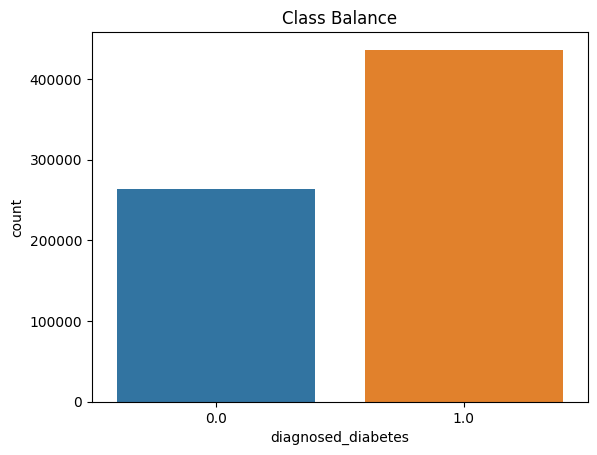

In [4]:
#EDA
#check target balance
sns.countplot(x="diagnosed_diabetes",data=train)
plt.title("Class Balance")
plt.show()


In [5]:
#Range checks(outlier checks)
print(train['age'].min(),train['age'].max())
print(train['bmi'].min(),train['bmi'].max())
print(train['waist_to_hip_ratio'].min(),train['waist_to_hip_ratio'].max())
print(train['sleep_hours_per_day'].min(),train['sleep_hours_per_day'].max())


19 89
15.1 38.4
0.68 1.05
3.1 9.9


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


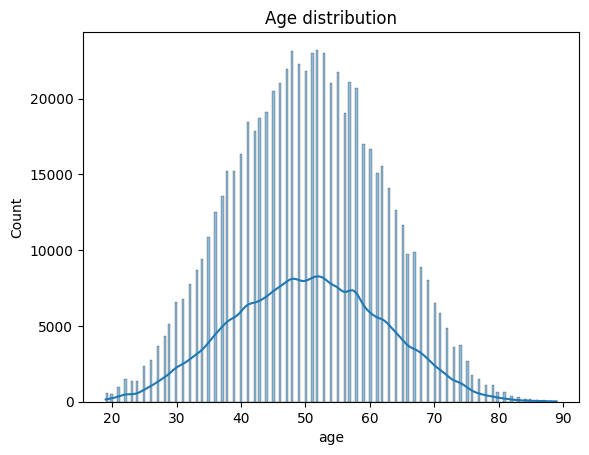

In [6]:
#Hisplot
sns.histplot(train['age'],kde=True)
plt.title("Age distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


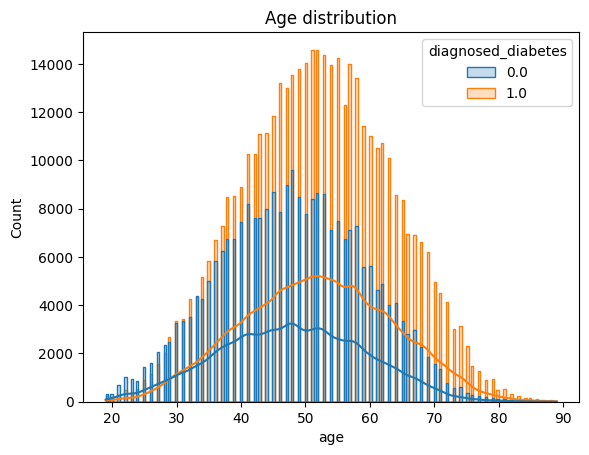

In [7]:
#Hisplot
sns.histplot(x='age',kde=True,hue='diagnosed_diabetes',element='step',data=train)
plt.title("Age distribution")
plt.show()

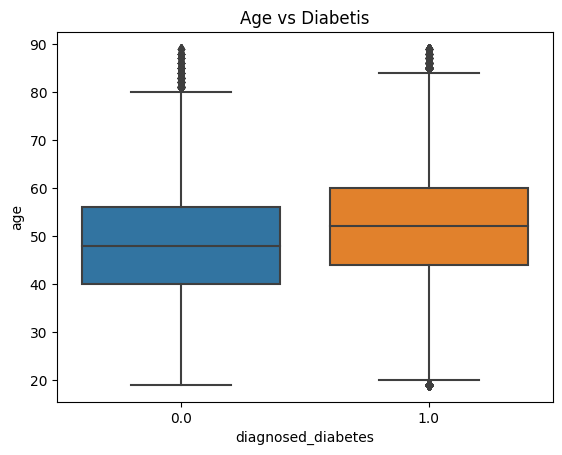

In [8]:
#Box plot for Age Distribution.
sns.boxplot(x="diagnosed_diabetes",y="age",data=train)
plt.title("Age vs Diabetis")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


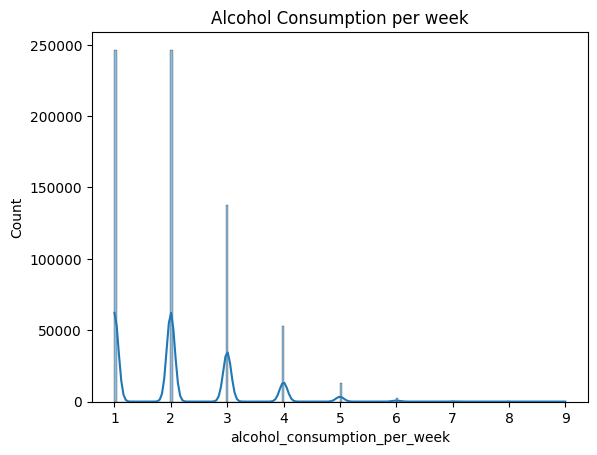

In [9]:
#Life style Factors
sns.histplot(train['alcohol_consumption_per_week'],kde=True)
plt.title("Alcohol Consumption per week")
plt.show()

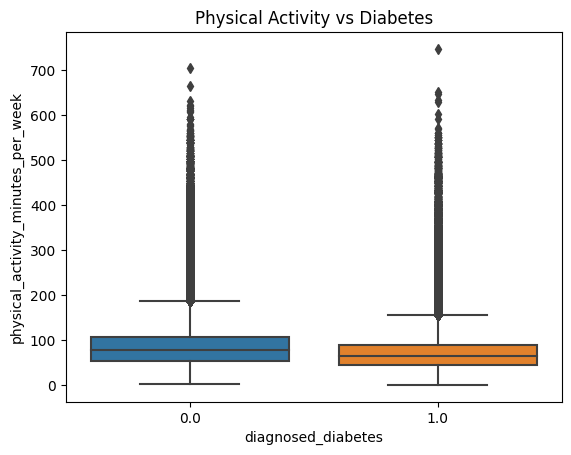

In [10]:
sns.boxplot(x="diagnosed_diabetes", y="physical_activity_minutes_per_week", data=train)
plt.title("Physical Activity vs Diabetes")
plt.show()

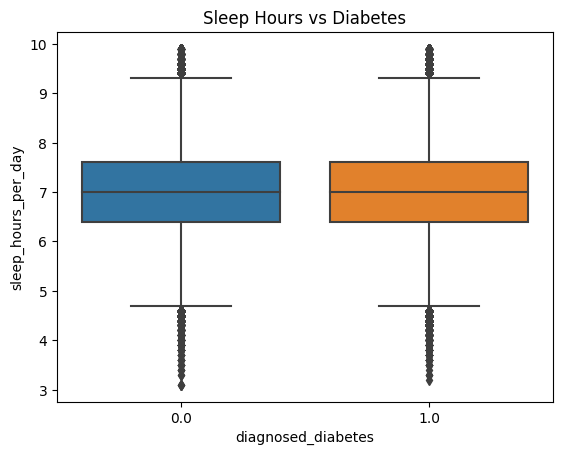

In [11]:
sns.boxplot(x="diagnosed_diabetes", y="sleep_hours_per_day", data=train)
plt.title("Sleep Hours vs Diabetes")
plt.show()

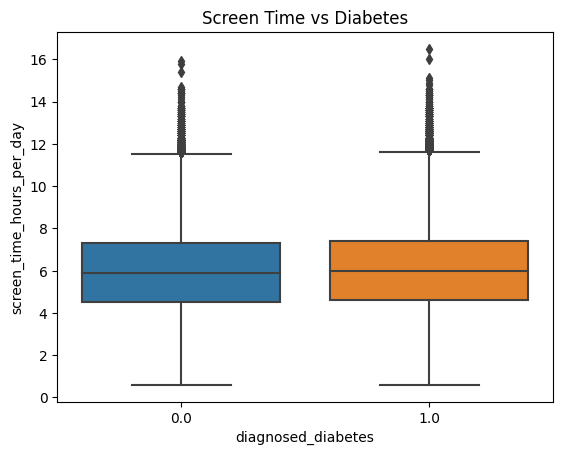

In [12]:
sns.boxplot(x="diagnosed_diabetes", y="screen_time_hours_per_day", data=train)
plt.title("Screen Time vs Diabetes")
plt.show()

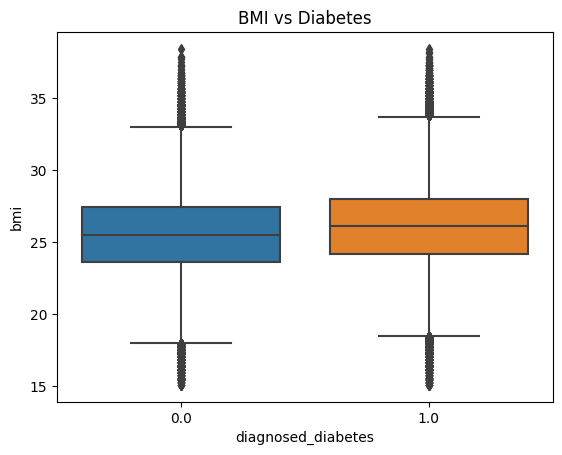

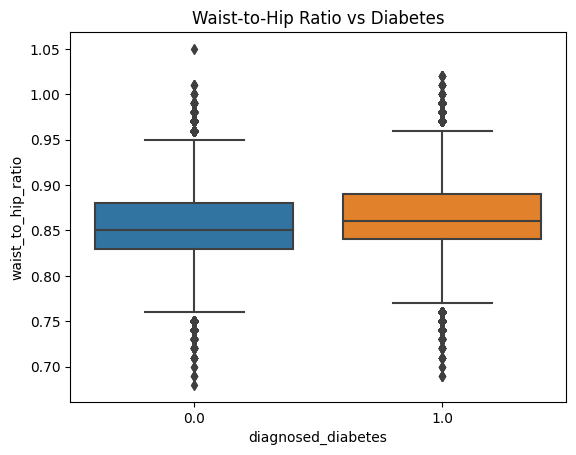

In [13]:
sns.boxplot(x="diagnosed_diabetes", y="bmi", data=train)
plt.title("BMI vs Diabetes")
plt.show()

sns.boxplot(x="diagnosed_diabetes", y="waist_to_hip_ratio", data=train)
plt.title("Waist-to-Hip Ratio vs Diabetes")
plt.show()


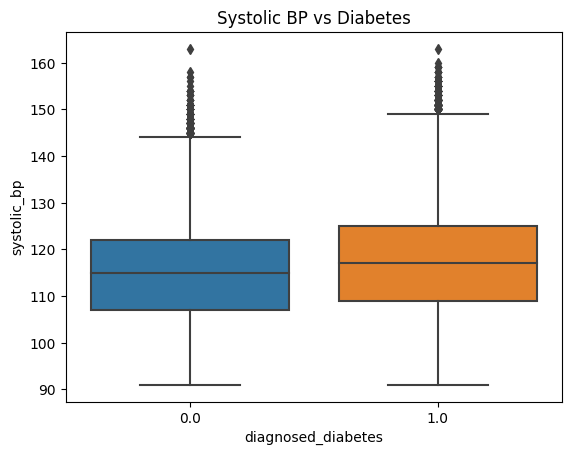

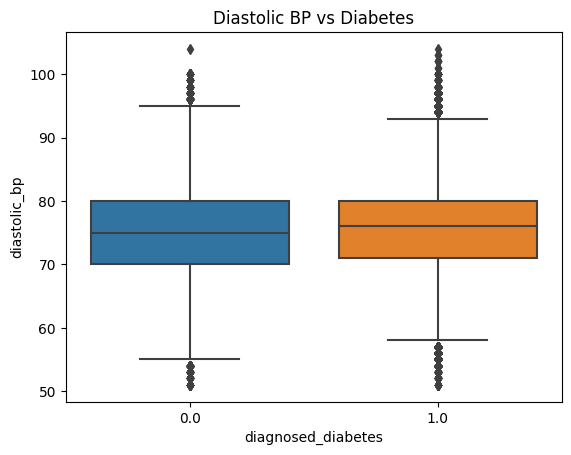

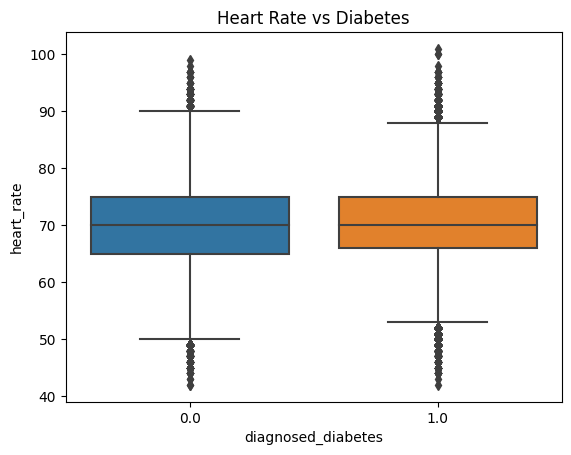

In [14]:
sns.boxplot(x="diagnosed_diabetes", y="systolic_bp", data=train)
plt.title("Systolic BP vs Diabetes")
plt.show()

sns.boxplot(x="diagnosed_diabetes", y="diastolic_bp", data=train)
plt.title("Diastolic BP vs Diabetes")
plt.show()

sns.boxplot(x="diagnosed_diabetes", y="heart_rate", data=train)
plt.title("Heart Rate vs Diabetes")
plt.show()


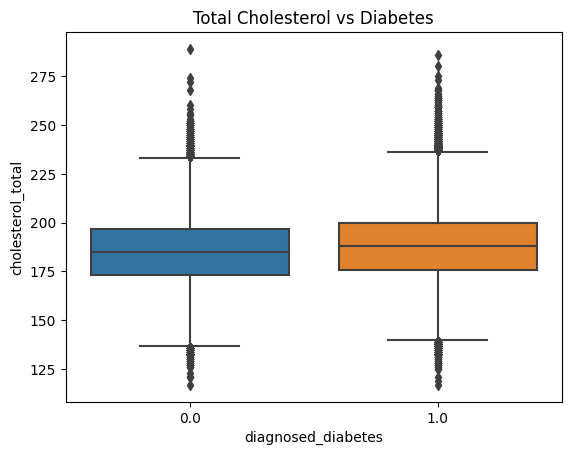

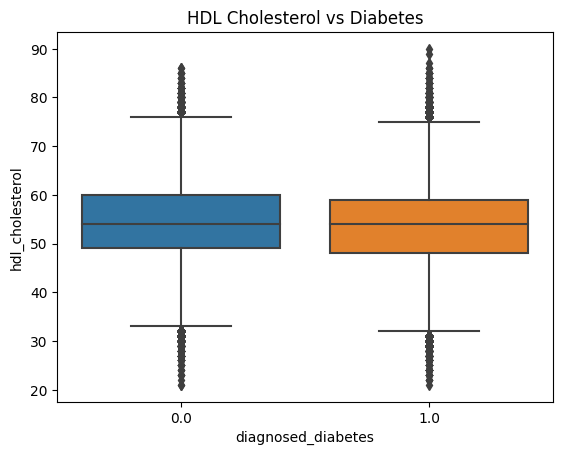

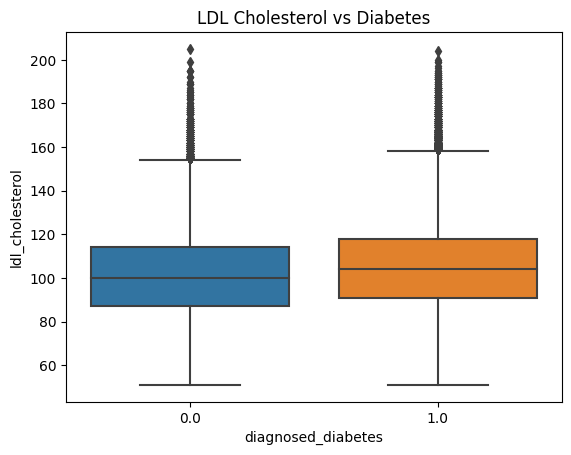

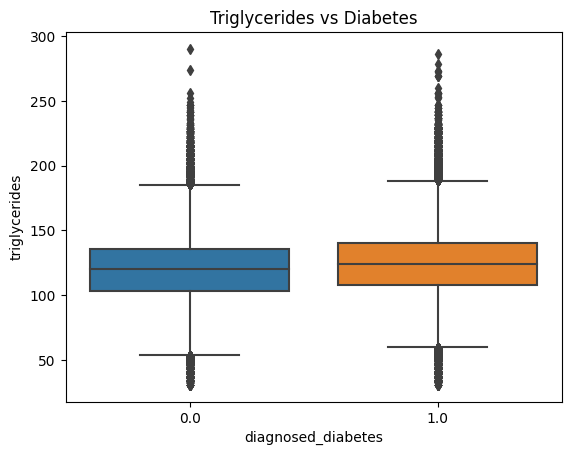

In [15]:
sns.boxplot(x="diagnosed_diabetes", y="cholesterol_total", data=train)
plt.title("Total Cholesterol vs Diabetes")
plt.show()

sns.boxplot(x="diagnosed_diabetes", y="hdl_cholesterol", data=train)
plt.title("HDL Cholesterol vs Diabetes")
plt.show()

sns.boxplot(x="diagnosed_diabetes", y="ldl_cholesterol", data=train)
plt.title("LDL Cholesterol vs Diabetes")
plt.show()

sns.boxplot(x="diagnosed_diabetes", y="triglycerides", data=train)
plt.title("Triglycerides vs Diabetes")
plt.show()


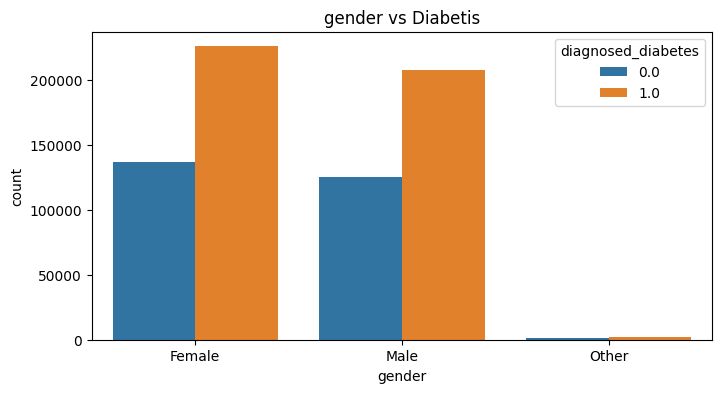

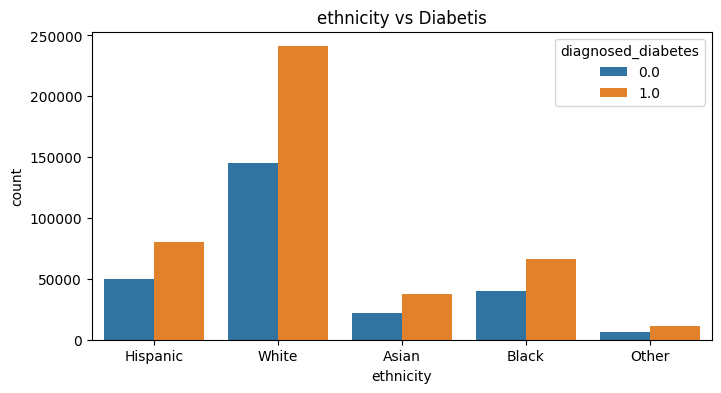

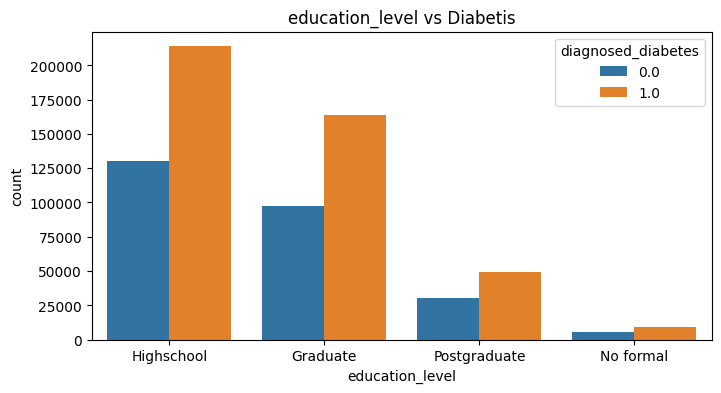

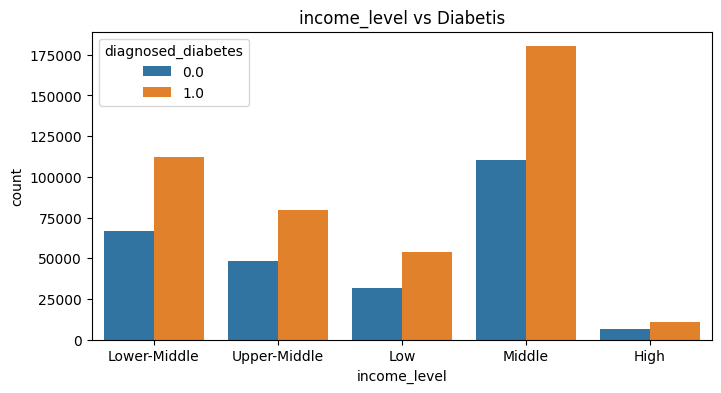

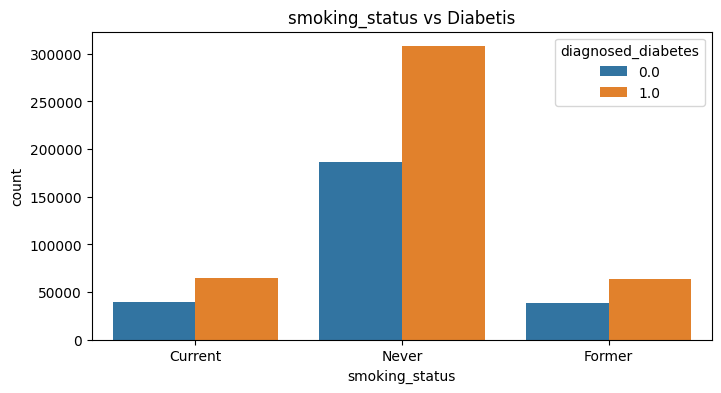

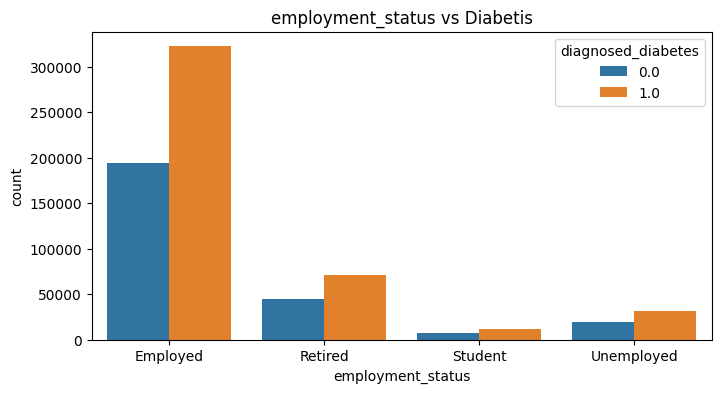

In [16]:
#Categorical Features
categorical_columns=["gender", "ethnicity", "education_level", "income_level", 
                    "smoking_status", "employment_status"]
for col in categorical_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,hue='diagnosed_diabetes',data=train)
    plt.title(f"{col} vs Diabetis")
    plt.show()

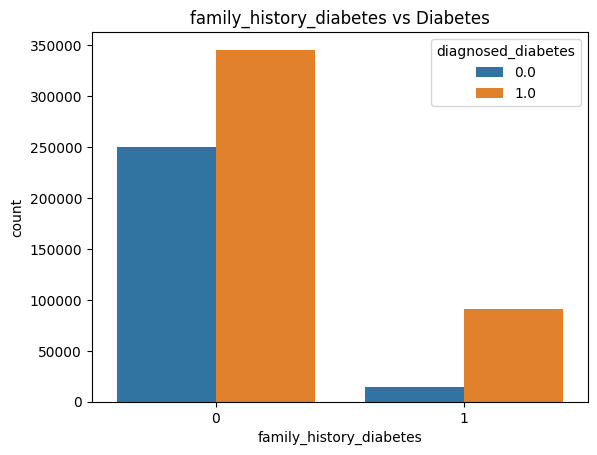

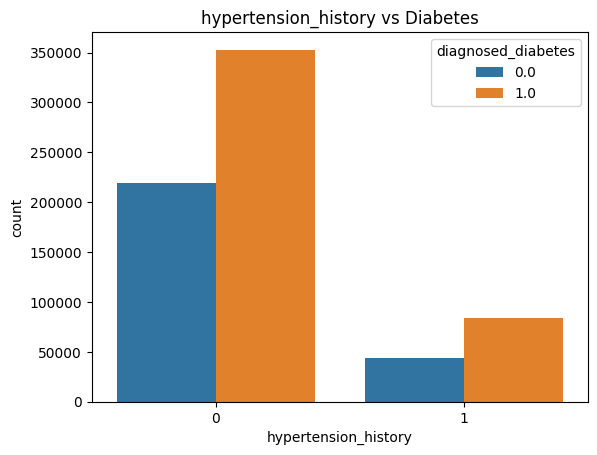

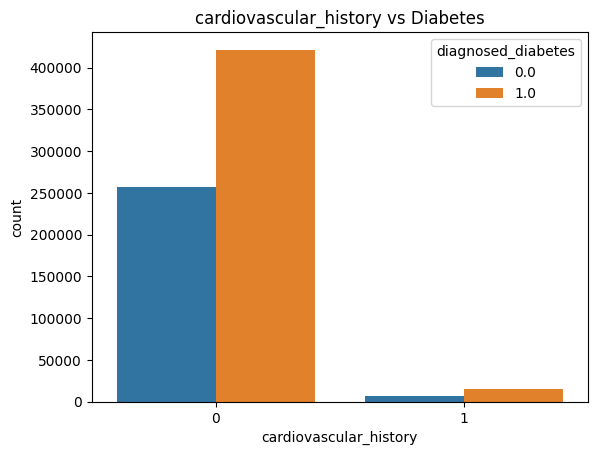

In [17]:
binary_cols = ["family_history_diabetes", "hypertension_history", "cardiovascular_history"]

for col in binary_cols:
    sns.countplot(x=col, hue="diagnosed_diabetes", data=train)
    plt.title(f"{col} vs Diabetes")
    plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


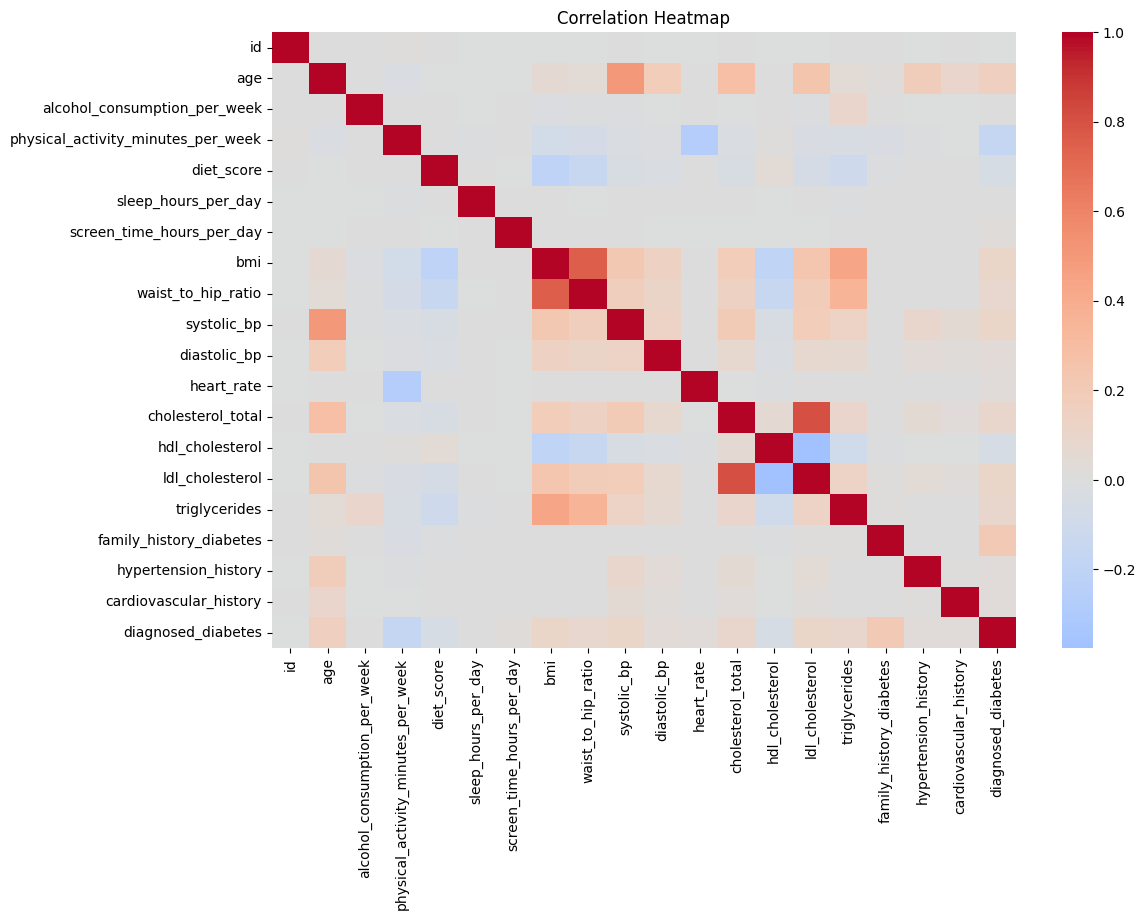

In [18]:
numeric_df = train.select_dtypes(include=['number'])


plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()
